In [1]:
import pandas as pd
from project_utils import *
from matplotlib.ticker import AutoMinorLocator, LogLocator


In [2]:
# df1 = pd.read_csv('dist_cat.csv')
# df2 = pd.read_csv('objects.csv')

In [3]:
# df = pd.merge(df1, df2, on='SNR_Name', how='inner')

In [4]:
# df = df.drop(columns=['Distance_kpc'])

In [5]:
# df.rename(columns={'Literature Dist. (kpc)': 'Distance_kpc'}, inplace=True)
# df.to_csv('dist_cat2.csv', index=False)

In [6]:
# df = process_raw_distance_cat(df)

In [7]:
df = pd.read_csv('dist_cat2.csv')

In [8]:
# Select the last 3 columns
df_spec = df[-1:]
df_spec = df_spec.reset_index(drop=True)
df_spec

#     SNR_Name Distance_kpc              Method V_LSR (km/s)  References  \
0  999  G180.0-01.7     1.3±0.22  Kinematic distance           20          20   

  Revised Dist. (kpc) Galactocentric Dist. (kpc)       Object     RA  \
0                   L                        1.2  G180.0-01.7  84.75   

         Dec  Ang_size  radius  pm_thresh Distance_Info  median_dist  \
0  27.833333     180.0   270.0         20           NaN          1.3   

   median_dist_error  
0               0.22

In [9]:
df_new,dfs = make_catalogue(df,load=True)

Initiating end of Query Processing for G024.7+00.6...
End of Query Processing Successfull for G024.7+00.6!!
Initiating end of Query Processing for G043.9+01.6...
End of Query Processing Successfull for G043.9+01.6!!
Initiating end of Query Processing for G065.3+05.7...
End of Query Processing Successfull for G065.3+05.7!!
Initiating end of Query Processing for G065.7+01.2...
End of Query Processing Successfull for G065.7+01.2!!
Initiating end of Query Processing for G067.6+00.9...
End of Query Processing Successfull for G067.6+00.9!!
Initiating end of Query Processing for G067.7+01.8...
End of Query Processing Successfull for G067.7+01.8!!
Initiating end of Query Processing for G069.0+02.7...
End of Query Processing Successfull for G069.0+02.7!!
Initiating end of Query Processing for G073.9+00.9...
End of Query Processing Successfull for G073.9+00.9!!
Initiating end of Query Processing for G078.2+02.1...
End of Query Processing Successfull for G078.2+02.1!!
Initiating end of Query Proc

In [10]:
dfs.keys()

dict_keys(['G024.7+00.6', 'G043.9+01.6', 'G065.3+05.7', 'G065.7+01.2', 'G067.6+00.9', 'G067.7+01.8', 'G069.0+02.7', 'G073.9+00.9', 'G078.2+02.1', 'G160.9+02.6', 'G166.0+04.3', 'G181.1+09.5', 'G189.1+03.0', 'G189.6+03.3', 'G205.5+00.5', 'G206.9+02.3', 'G279.0+01.1', 'G180.0-01.7'])

In [11]:
df_new.head()

source_id          ra        dec  parallax  parallax_error  \
0  4252900157227107968  278.649839  -7.141387  0.365408        0.014205   
1  4255905981507987328  278.521285  -6.973591  0.401438        0.016385   
2  4252908021300114560  278.628303  -7.027900  0.394516        0.016083   
3  4312299314438455424  286.392191  10.353746  0.449009        0.018155   
4  4312480493347107072  286.298843  10.315299  0.395567        0.017828   

       pmra     pmdec         pm  phot_g_mean_mag     bp_rp  ...  Ang_size  \
0 -0.050460 -2.101928   2.102533        13.046144  2.471680  ...      30.0   
1 -0.837436 -1.368805   1.604658        12.757184  1.310301  ...      30.0   
2  0.228784 -3.037569   3.046173        13.517707  2.659662  ...      30.0   
3 -6.328243 -8.229850  10.381575        13.849354  2.696686  ...      60.0   
4 -1.043500 -3.387818   3.544884        13.901791  1.608985  ...      60.0   

  median_dist  median_dist_error      snr_ra    snr_dec      dist_pc  \
0         3.5                0.2  278.541667  -7.083333  2736.670664   
1         3.5                0.2  278.541667  -7.083333  2491.047162   
2         3.5                0.2  278.541667  -7.083333  2534.752667   
3         3.1                1.2  286.458333  10.500000  2227.124929   
4         3.1                1.2  286.458333  10.500000  2528.014687   

      pm_km_s   total_vel       snr_sep      score  
0   27.273677         NaN    439.318000  30.729792  
1   18.947097         NaN    401.728655  23.447773  
2   36.598938   51.789906    368.281814  22.010630  
3  109.593846  132.512088  68792.492390  52.205480  
4   42.477604         NaN  68530.069186  49.986128  

[5 rows x 22 columns]

In [12]:
#plot_pm_vs_radial_velocity(df_new,median_dist=False)

In [13]:
def generate_latex_table(df, snr_name="SNR Name"):
    """
    Generates a LaTeX table for the top candidate binary star in an SNR from a pandas DataFrame.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing columns ['source_id', 'ra', 'dec', 'dist_pc', 'pm_km_s'].
        snr_name (str): Name of the supernova remnant for the table caption.
    
    Returns:
        str: LaTeX formatted table as a string.
    """
    if df.empty:
        return "Error: DataFrame is empty. No candidate data available."

    # Extract the first row (top candidate)
    row = df.iloc[0]

    # Generate LaTeX table
    latex_str = f"""
\\begin{{table*}}
    \\centering
    \\caption{{Top candidate for the Companion Binary Star in SNR {snr_name}}}
    \\label{{tab:candidate_info}}
    \\begin{{tabular}}{{cc}}
    \\hline
    Target Description & \\\\
    \\hline
    Gaia ID & {int(row['source_id'])} \\\\
    RA (J2000) & {row['ra']:.6f} \\\\
    Dec (J2000) & {row['dec']:.6f} \\\\
    Distance [pc] & {row['dist_pc']:.6f} \\\\
    Proper Motion [km/s] & {row['pm_km_s']:.6f} \\\\
    \\hline
    \\end{{tabular}}
\\end{{table*}}
"""
    return latex_str


In [14]:
def make_plots(snr:str,dfs=None,savefile=None):
    df_t = dfs[snr]
    plot_pm_vs_radial_velocity(df_t,median_dist=True,make_title=False,add_score=True,savefile=savefile+'pm_vs_radial_velocity.png')
    plot_radec(df_t,plot_pm_dir=None,make_title=False,add_score=True,savefile=savefile+'radec.png')
    plot_cmd(df_t,save_file=savefile+'cmd.png')

    top_cand_og = df_t[df_t["score"] == df_t["score"].max()]

    top_cand=top_cand_og[['source_id', 'ra', 'dec',  'dist_pc', 'pm_km_s']]

    ltx = generate_latex_table(top_cand,snr)

    print(ltx)

    return top_cand_og


In [15]:
for i,k in enumerate(dfs.keys()):
    print(i,k)

0 G024.7+00.6
1 G043.9+01.6
2 G065.3+05.7
3 G065.7+01.2
4 G067.6+00.9
5 G067.7+01.8
6 G069.0+02.7
7 G073.9+00.9
8 G078.2+02.1
9 G160.9+02.6
10 G166.0+04.3
11 G181.1+09.5
12 G189.1+03.0
13 G189.6+03.3
14 G205.5+00.5
15 G206.9+02.3
16 G279.0+01.1
17 G180.0-01.7


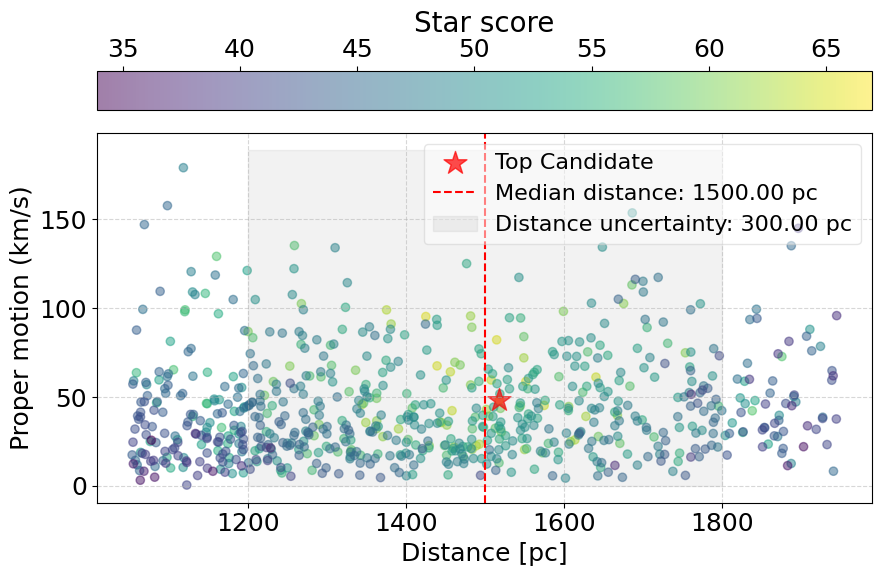

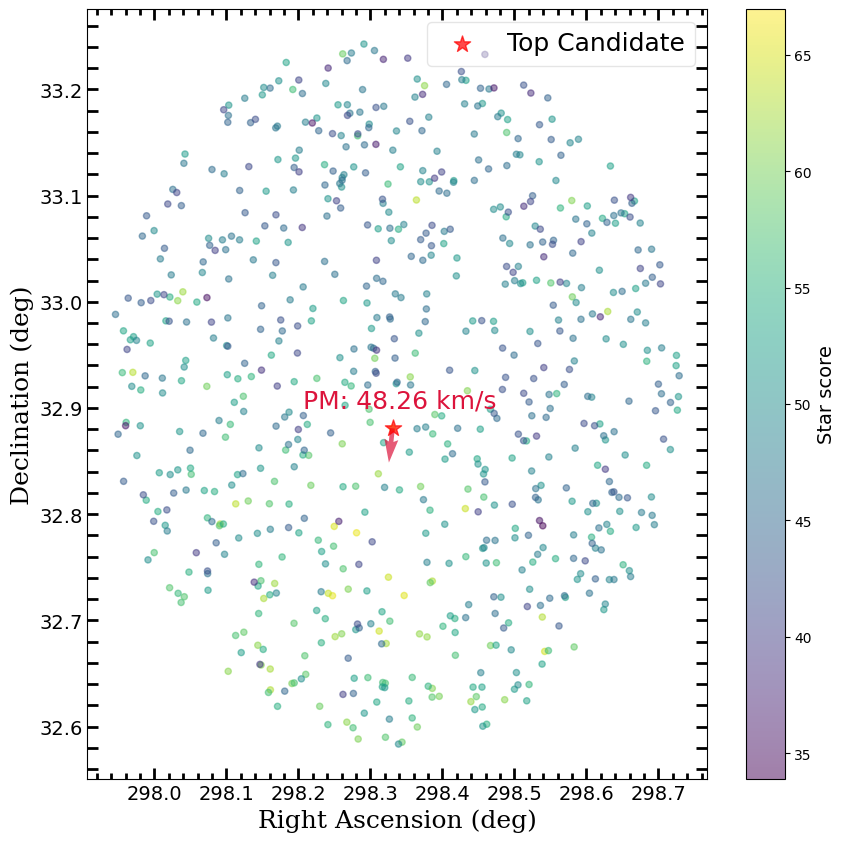


\begin{table*}
    \centering
    \caption{Top candidate for the Companion Binary Star in SNR G069.0+02.7}
    \label{tab:candidate_info}
    \begin{tabular}{cc}
    \hline
    Target Description & \\
    \hline
    Gaia ID & 2034315078031982080 \\
    RA (J2000) & 298.330714 \\
    Dec (J2000) & 32.880866 \\
    Distance [pc] & 1517.889840 \\
    Proper Motion [km/s] & 48.262395 \\
    \hline
    \end{tabular}
\end{table*}



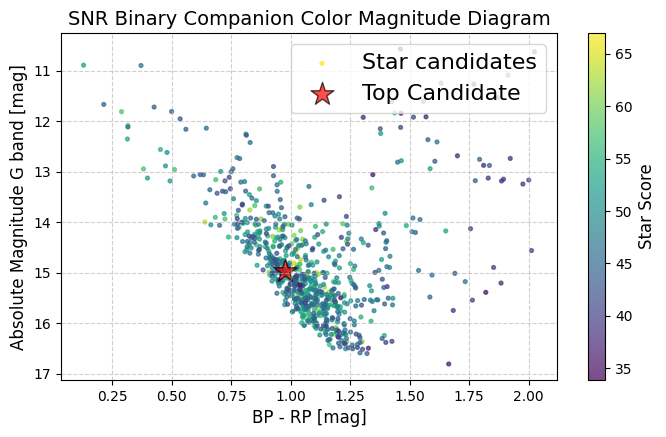

In [16]:
snr = 'G069.0+02.7'
top_cand = make_plots(snr=snr,dfs=dfs,savefile=snr)

In [17]:
top_cand.ra.values[0],top_cand.dec.values[0]

(np.float64(298.33071427485623), np.float64(32.88086588786774))

G065.3+05.7


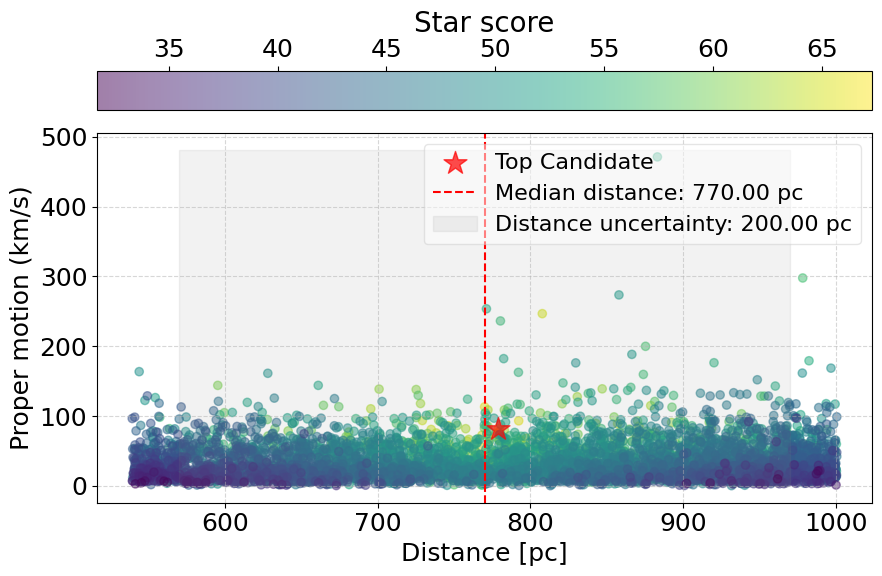

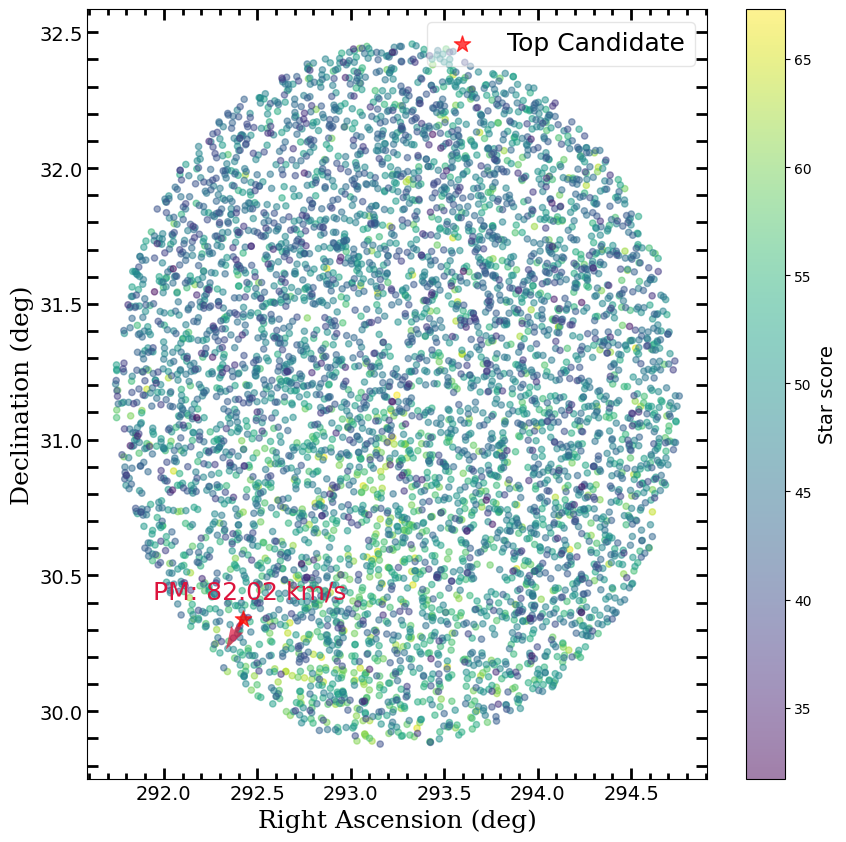

G067.6+00.9


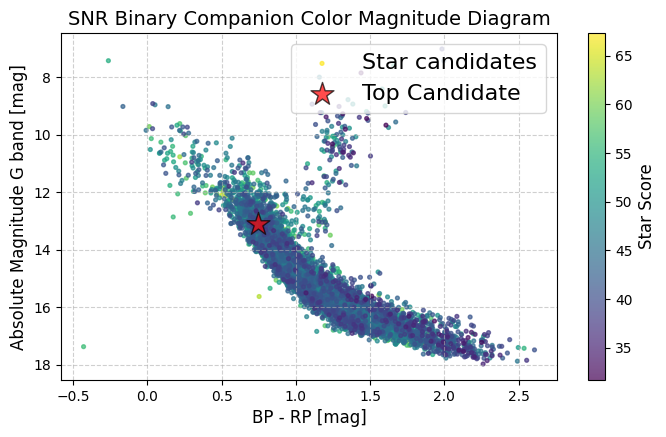

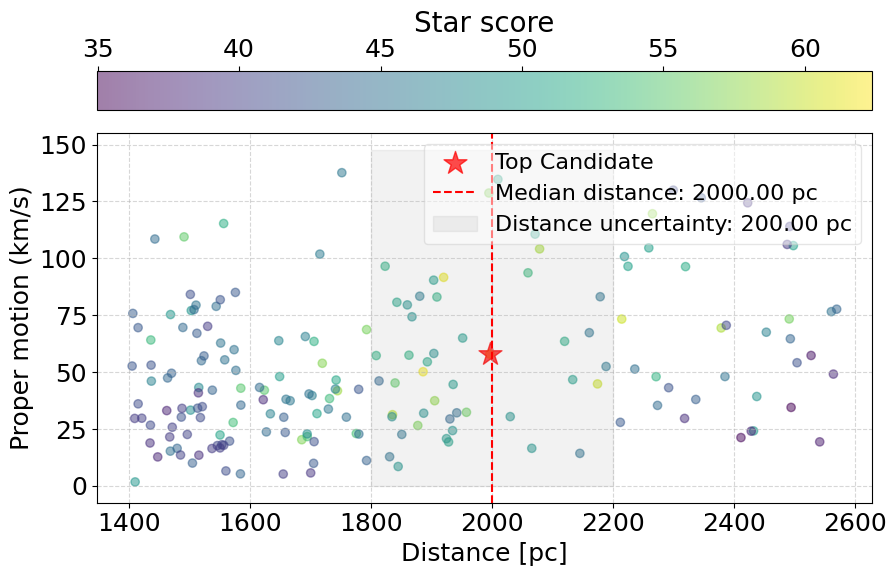

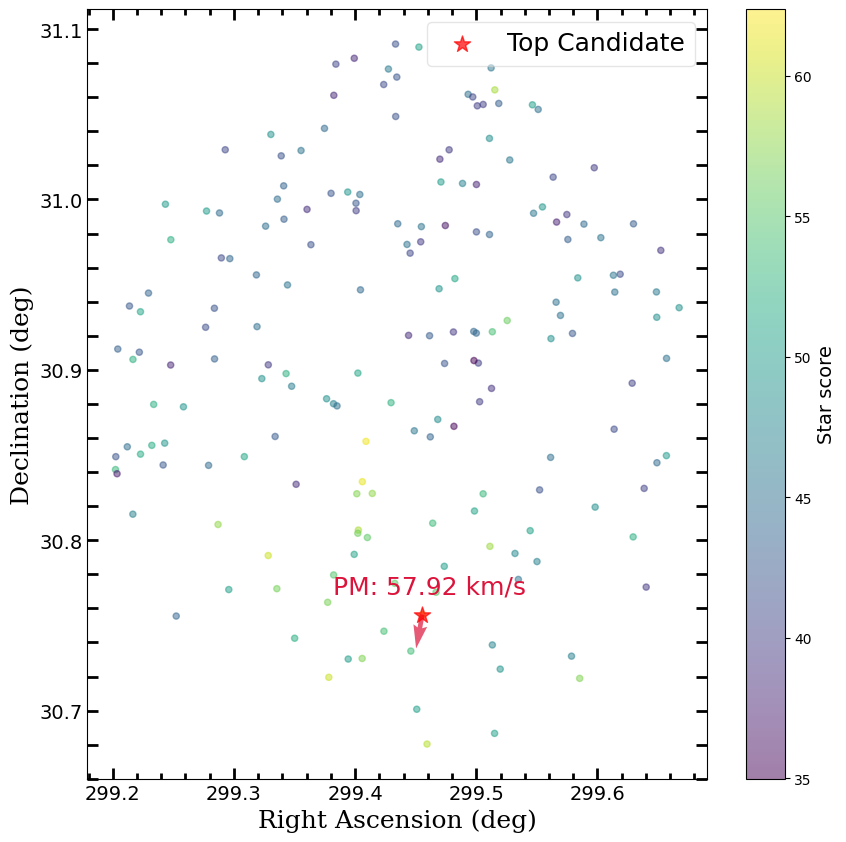

G069.0+02.7


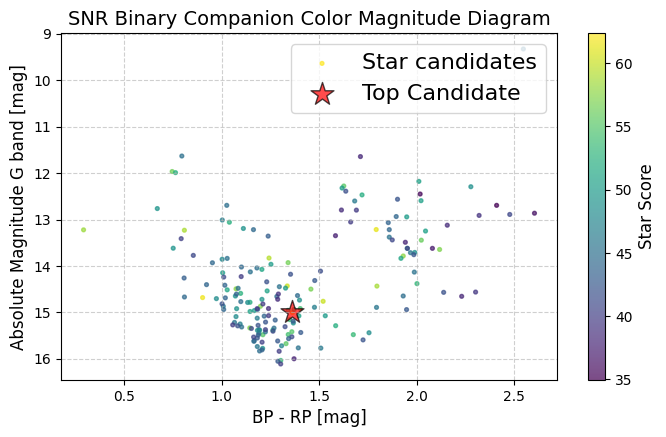

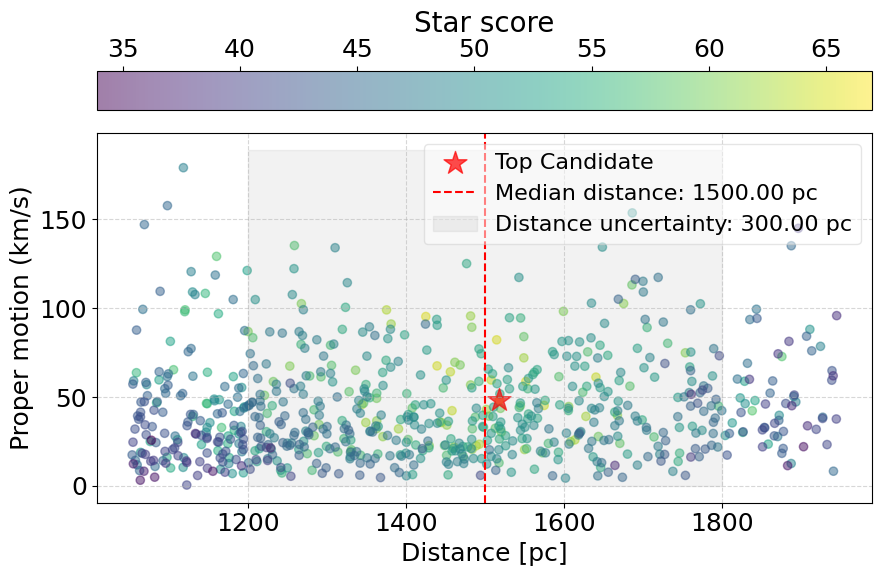

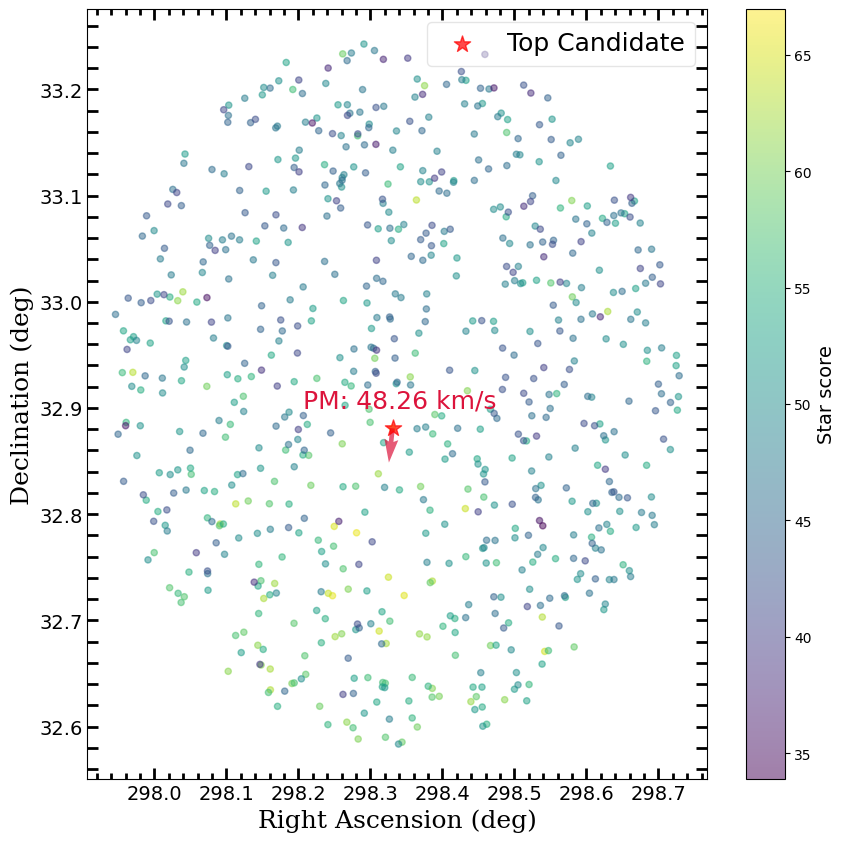

G160.9+02.6


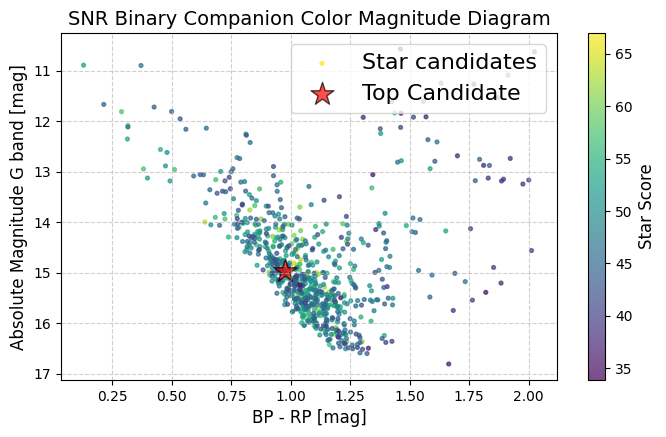

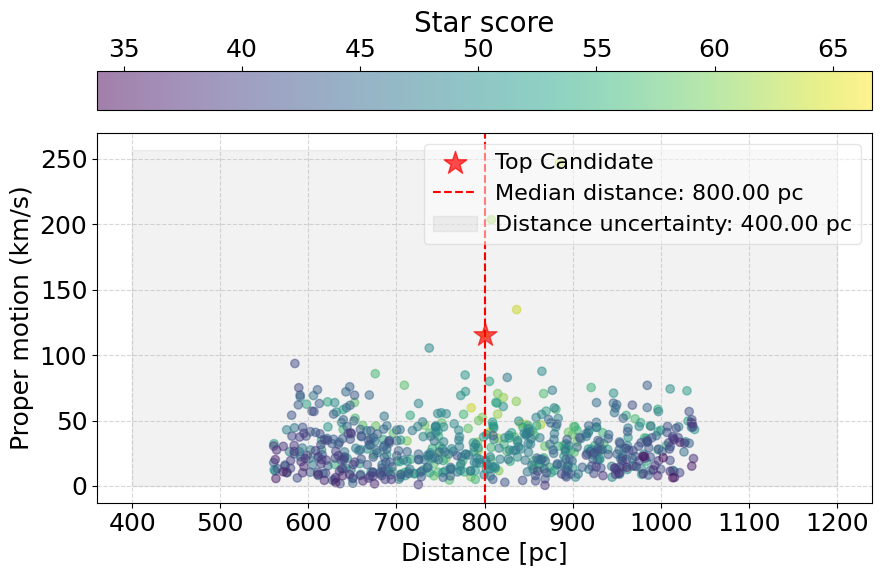

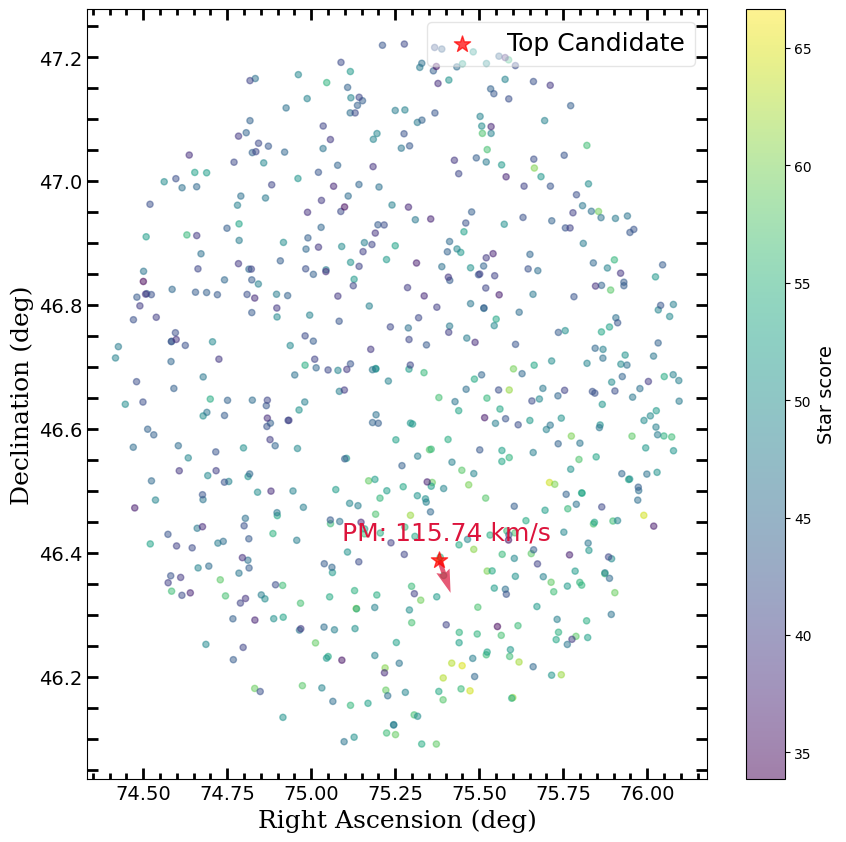

G166.0+04.3


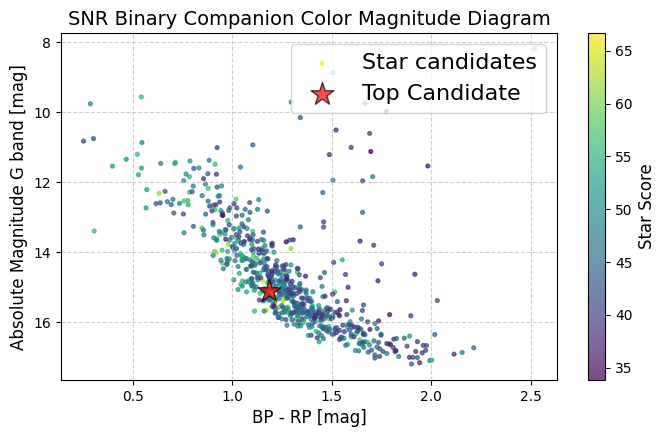

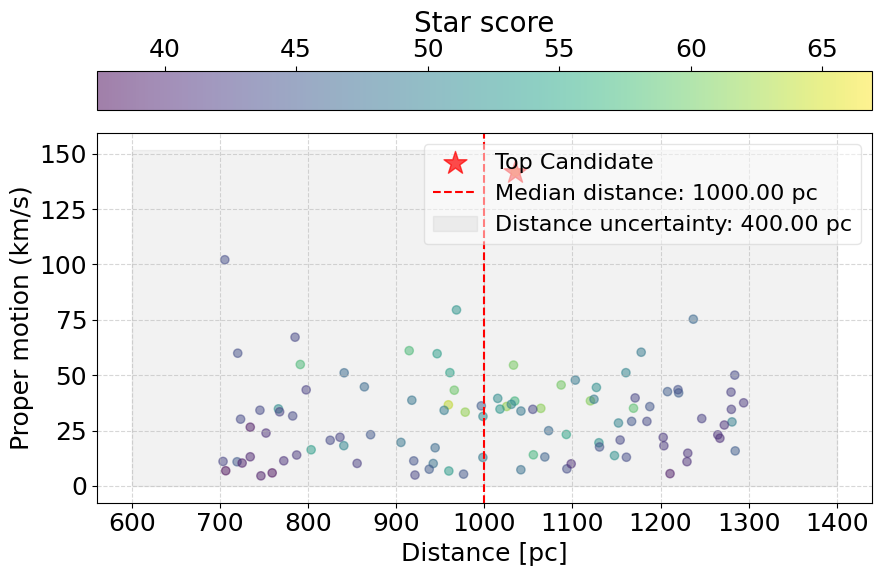

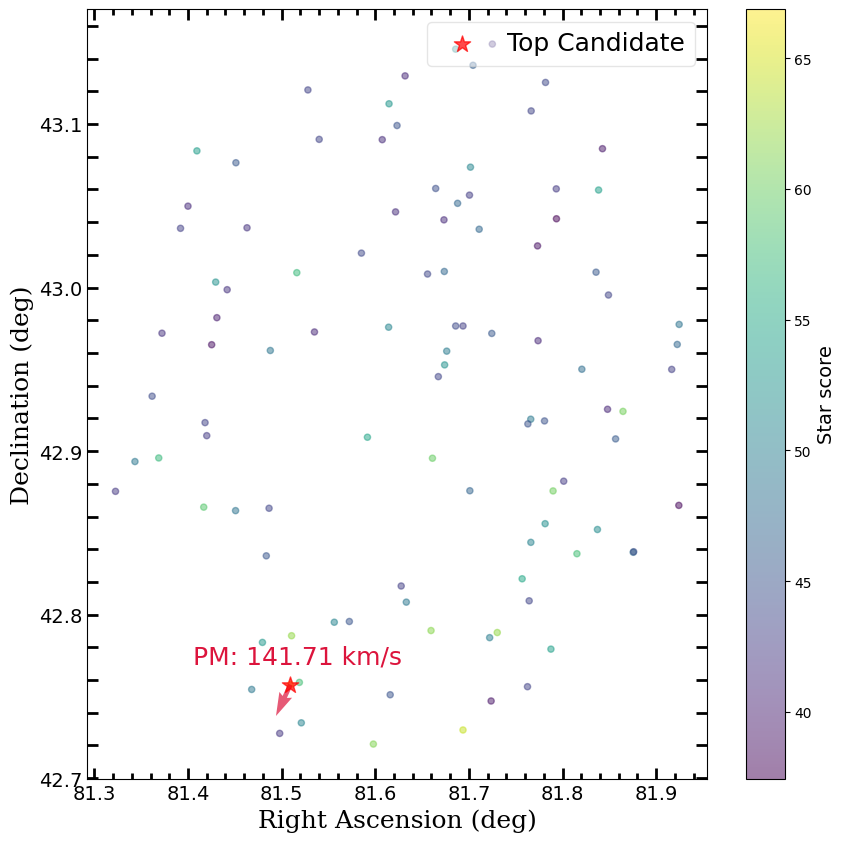

G181.1+09.5


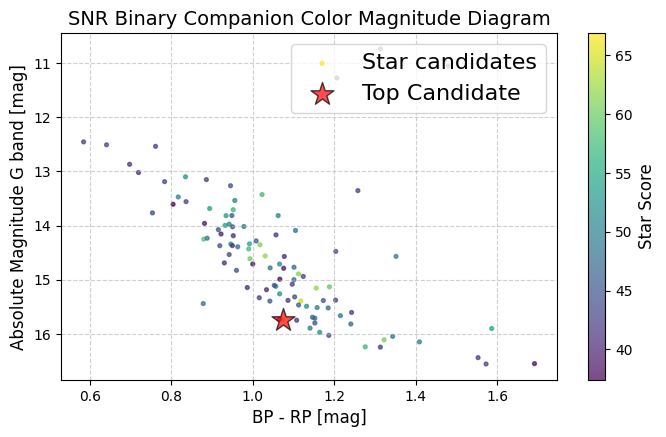

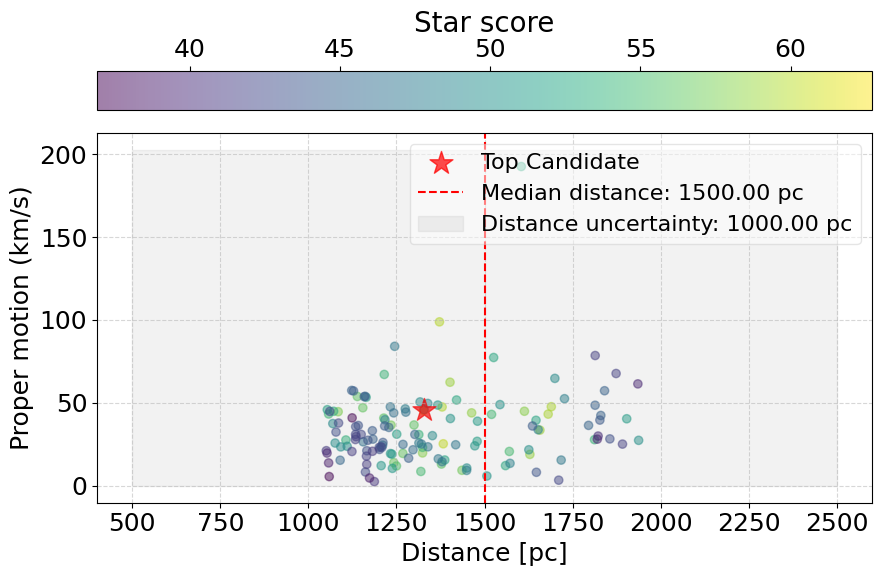

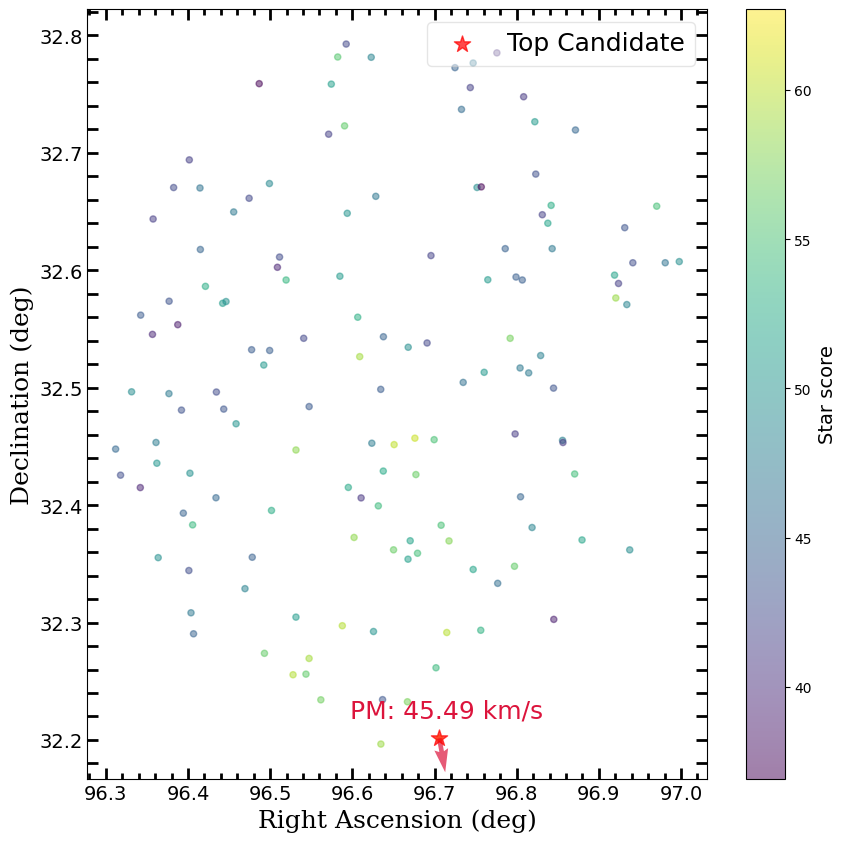

G189.6+03.3


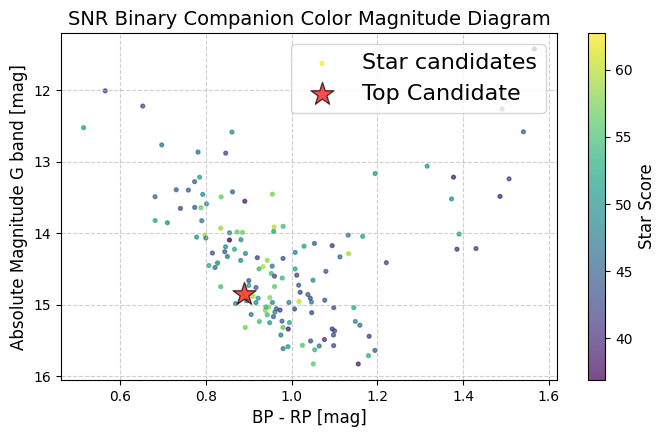

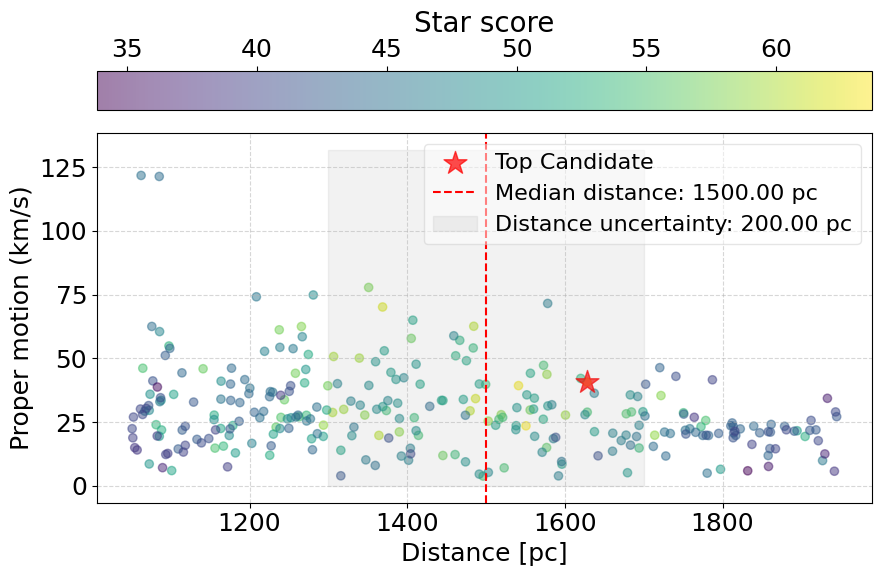

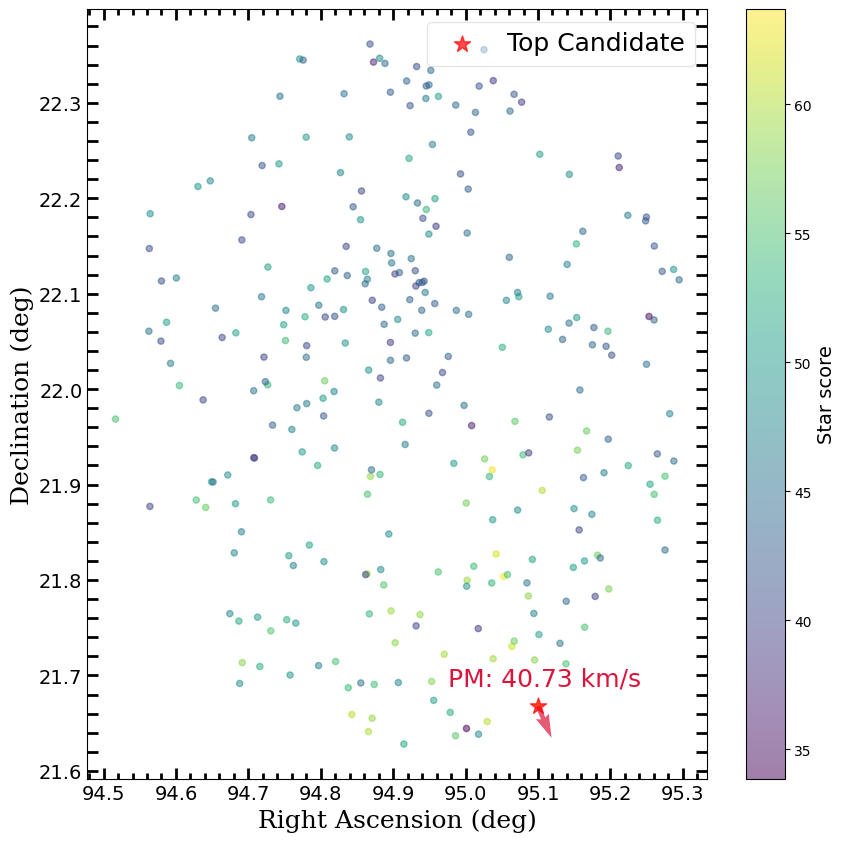

G205.5+00.5


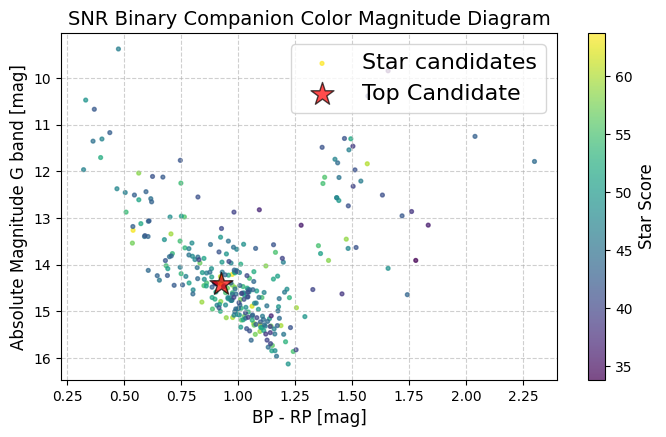

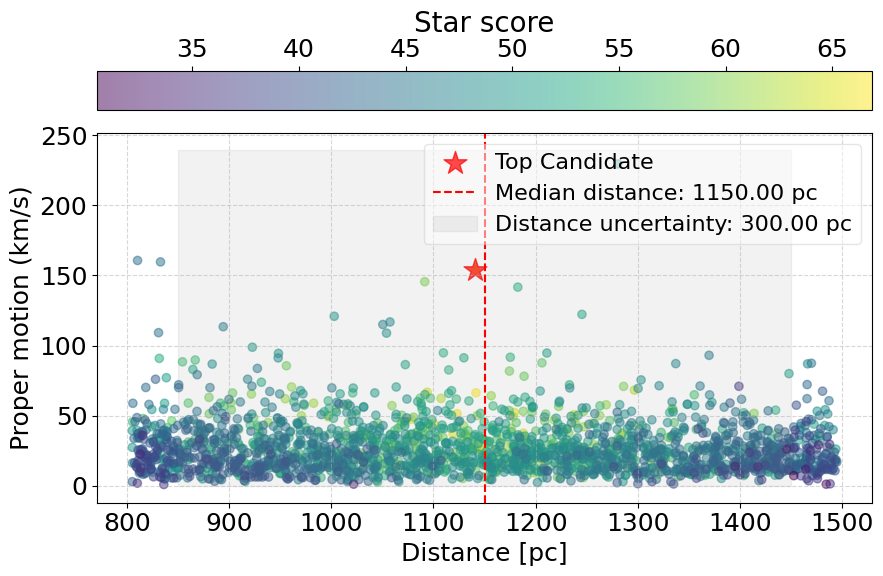

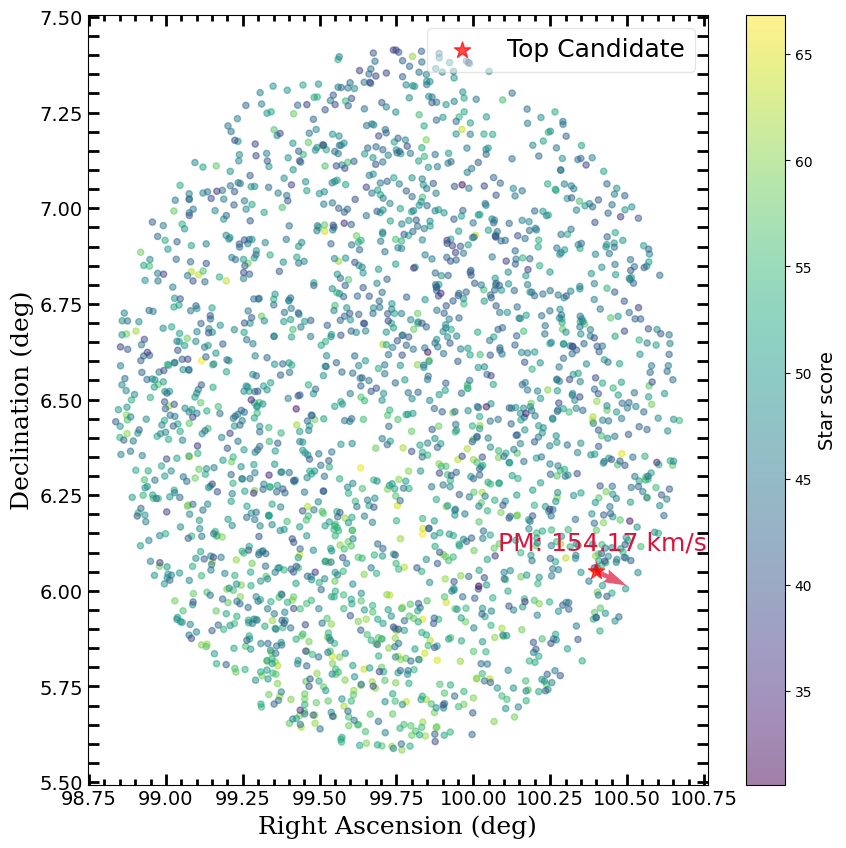

G279.0+01.1


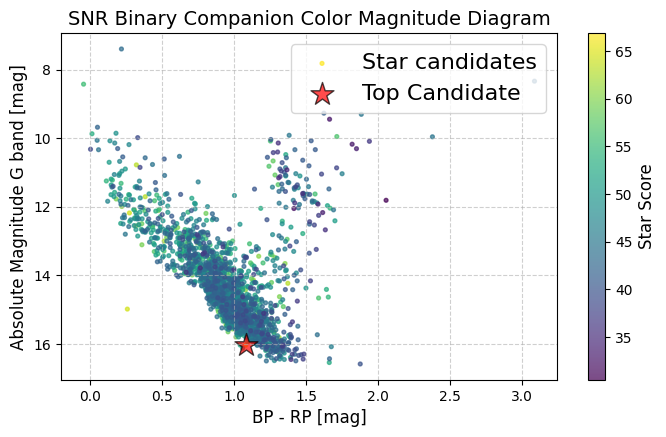

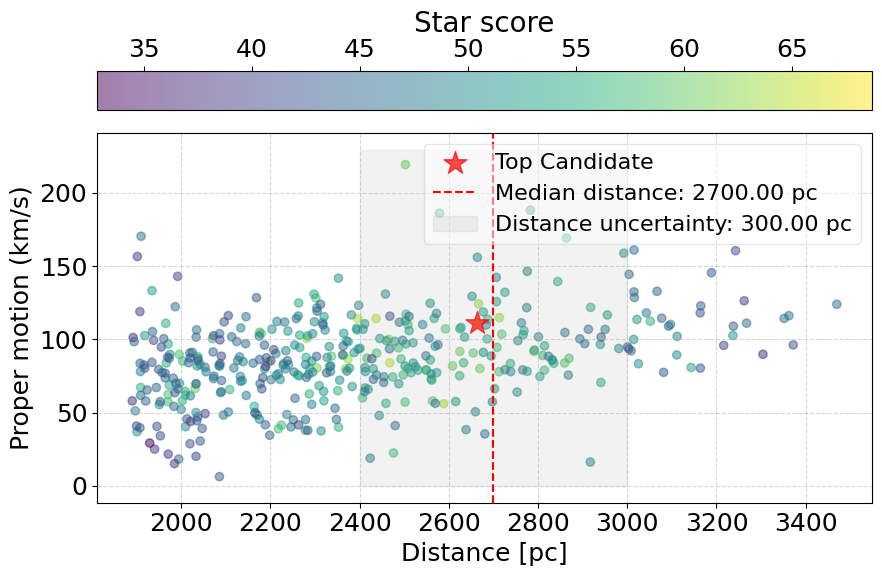

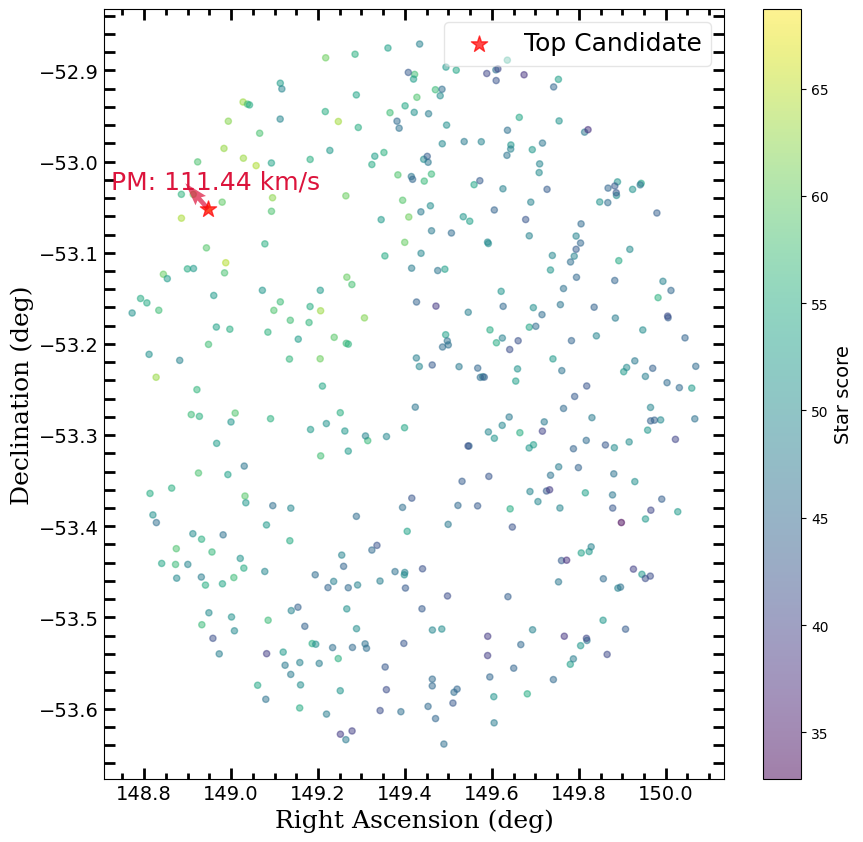

G180.0-01.7


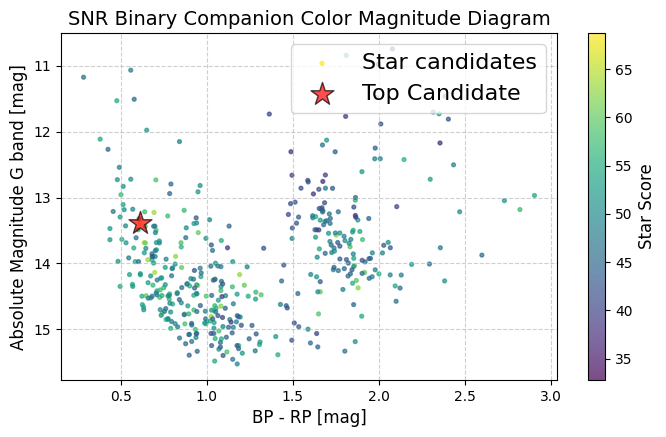

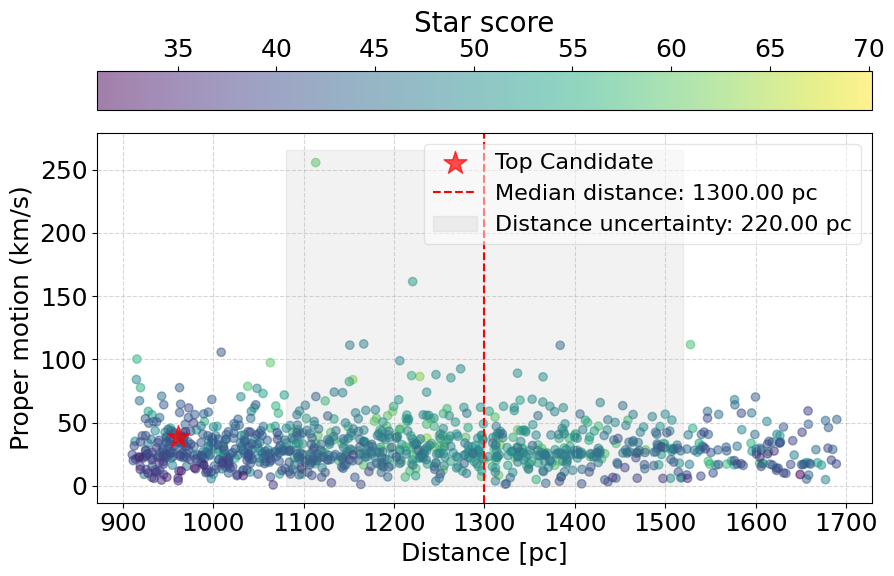

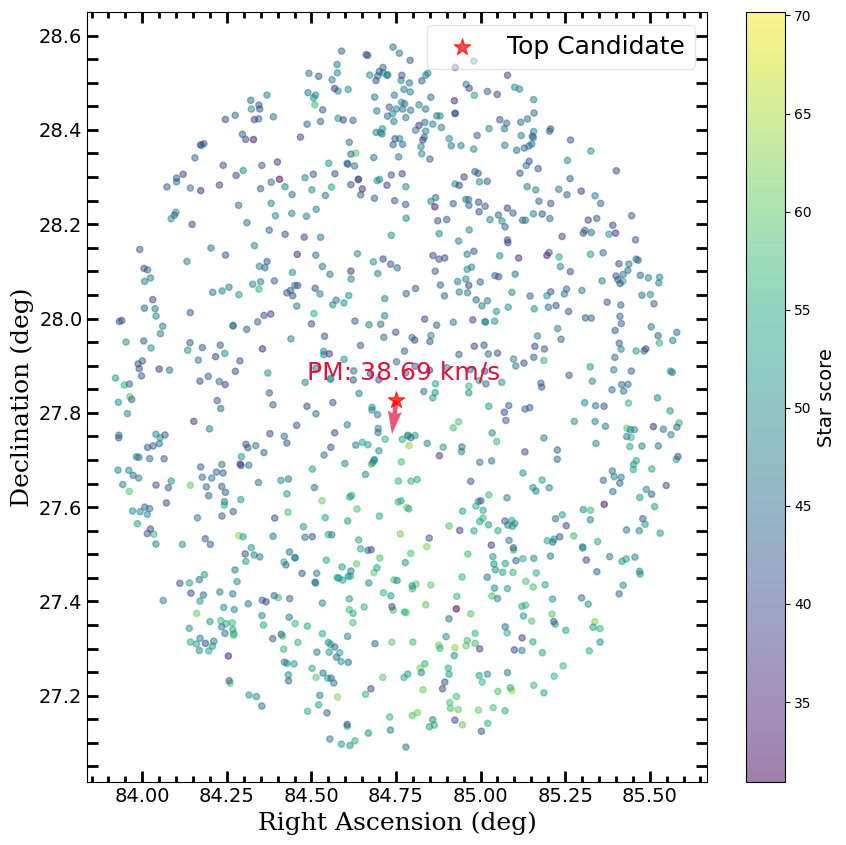

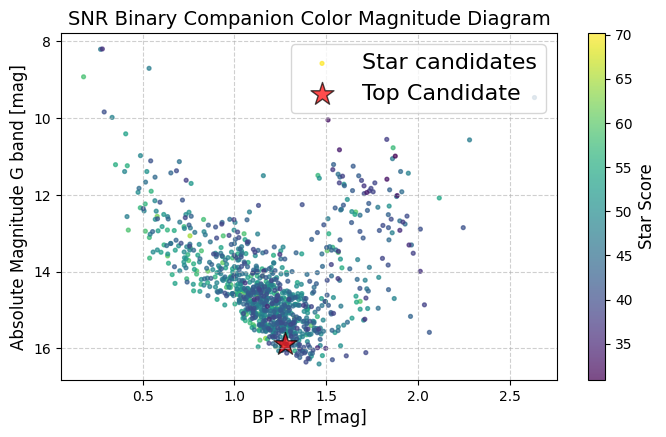

In [18]:
for name,df_t in dfs.items():
    
    if len(df_t) > 100:
        print(name) 
        plot_pm_vs_radial_velocity(df_t,median_dist=True,make_title=False,add_score=True)
        plot_radec(df_t,plot_pm_dir=None,make_title=False,add_score=True)
        plot_cmd(df_t)